Q21 Write a Python program to train an SVM Classifier on the Iris dataset and   evaluate accuracy

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (SVM performs better with scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


Q22 Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Make predictions
y_pred_linear = svm_linear.predict(X_test)

# Calculate accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy of SVM with Linear Kernel: {accuracy_linear:.4f}")

# Train SVM with an RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_pred_rbf = svm_rbf.predict(X_test)

# Calculate accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy of SVM with RBF Kernel: {accuracy_rbf:.4f}")

# Compare accuracies
if accuracy_rbf > accuracy_linear:
    print("RBF kernel performs better.")
elif accuracy_rbf < accuracy_linear:
    print("Linear kernel performs better.")
else:
    print("Both kernels perform equally well.")


Accuracy of SVM with Linear Kernel: 0.9444
Accuracy of SVM with RBF Kernel: 0.9722
RBF kernel performs better.


Q23 Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

# Load dataset (using California Housing dataset as an alternative to the deprecated Boston dataset)
data = fetch_california_housing()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better SVR performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Predict on test data
y_pred = svr.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.3245


Q24 Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary

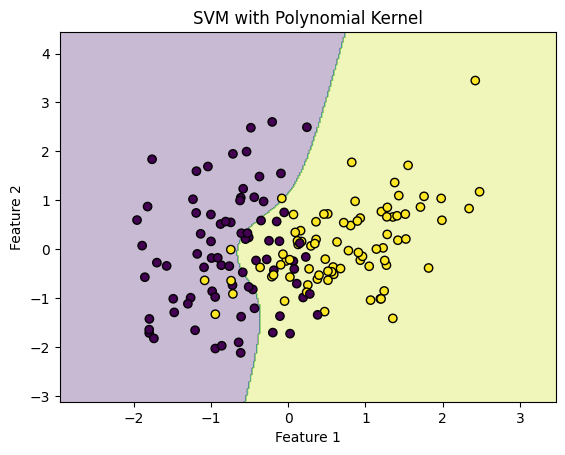

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM with a polynomial kernel
svm = SVC(kernel='poly', degree=3, C=1.0)
svm.fit(X_train, y_train)

# Function to visualize the decision boundary
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM with Polynomial Kernel")
    plt.show()

# Plot decision boundary
plot_decision_boundary(svm, X_train, y_train)


 Q25 Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naïve Bayes classifier
model = GaussianNB()

# Train the classifier
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9737


Q26 Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Load dataset (full dataset without category filtering)
train_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test_data = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

# Vectorize using CountVectorizer (Bag of Words)
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(train_data.data)
X_test = vectorizer.transform(test_data.data)

# Train MultinomialNB classifier
classifier = MultinomialNB()
classifier.fit(X_train, train_data.target)

# Predict and evaluate
predicted = classifier.predict(X_test)
print(classification_report(test_data.target, predicted, target_names=train_data.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.40      0.49      0.44       319
           comp.graphics       0.49      0.69      0.57       389
 comp.os.ms-windows.misc       0.50      0.00      0.01       394
comp.sys.ibm.pc.hardware       0.46      0.61      0.53       392
   comp.sys.mac.hardware       0.53      0.64      0.58       385
          comp.windows.x       0.71      0.66      0.69       395
            misc.forsale       0.76      0.73      0.75       390
               rec.autos       0.62      0.69      0.65       396
         rec.motorcycles       0.64      0.73      0.68       398
      rec.sport.baseball       0.72      0.76      0.74       397
        rec.sport.hockey       0.51      0.71      0.60       399
               sci.crypt       0.81      0.63      0.70       396
         sci.electronics       0.58      0.52      0.55       393
                 sci.med       0.74      0.66      0.69       396
         

Q27 Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually

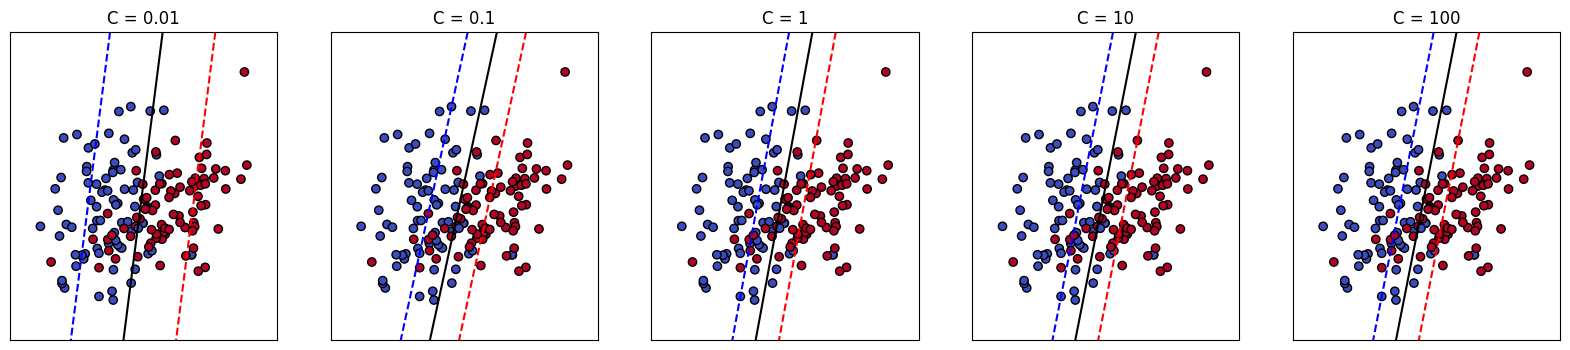

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different values of C to compare
C_values = [0.01, 0.1, 1, 10, 100]

fig, axes = plt.subplots(1, len(C_values), figsize=(20, 4))

for i, C in enumerate(C_values):
    svm = SVC(C=C, kernel='linear')
    svm.fit(X_train, y_train)

    # Plot decision boundary
    ax = axes[i]
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')

    # Create grid for decision boundary
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                         np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'black', 'red'], linestyles=['dashed', 'solid', 'dashed'])
    ax.set_title(f'C = {C}')
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


 Q28 Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Binarizer
from sklearn.datasets import load_breast_cancer
from sklearn import datasets


# Load second dataset (Breast Cancer dataset)
breast_cancer = load_breast_cancer()
X_cancer = breast_cancer.data
y_cancer = breast_cancer.target

# Binarize the breast cancer dataset (convert it to binary features)
binarizer = Binarizer(threshold=np.median(X_cancer))
X_cancer = binarizer.fit_transform(X_cancer)

# Function to train and evaluate Bernoulli Naïve Bayes
def train_and_evaluate(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = BernoulliNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on {dataset_name}: {accuracy:.4f}")

# Train and evaluate  dataset
train_and_evaluate(X_cancer, y_cancer, "Breast Cancer Dataset")


Accuracy on Breast Cancer Dataset: 0.8421


Q29 Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
# Load the Wine dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate SVM without scaling
svm_unscaled = SVC()
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
unscaled_accuracy = accuracy_score(y_test, y_pred_unscaled)

# Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)
svm_minmax = SVC()
svm_minmax.fit(X_train_minmax, y_train)
y_pred_minmax = svm_minmax.predict(X_test_minmax)
minmax_accuracy = accuracy_score(y_test, y_pred_minmax)

# Apply Standardization (Z-score Scaling)
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)
svm_standard = SVC()
svm_standard.fit(X_train_standard, y_train)
y_pred_standard = svm_standard.predict(X_test_standard)
standard_accuracy = accuracy_score(y_test, y_pred_standard)

# Print results
print(f"Accuracy without scaling: {unscaled_accuracy:.4f}")
print(f"Accuracy with Min-Max Scaling: {minmax_accuracy:.4f}")
print(f"Accuracy with Standardization: {standard_accuracy:.4f}")


Accuracy without scaling: 0.8056
Accuracy with Min-Max Scaling: 1.0000
Accuracy with Standardization: 1.0000


Q30 Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gaussian Naïve Bayes without Laplace smoothing (default var_smoothing)
gnb_no_smoothing = GaussianNB(var_smoothing=1e-9)
gnb_no_smoothing.fit(X_train, y_train)
y_pred_no_smoothing = gnb_no_smoothing.predict(X_test)
accuracy_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)

# Train Gaussian Naïve Bayes with Laplace smoothing (higher var_smoothing)
gnb_with_smoothing = GaussianNB(var_smoothing=1e-2)
gnb_with_smoothing.fit(X_train, y_train)
y_pred_with_smoothing = gnb_with_smoothing.predict(X_test)
accuracy_with_smoothing = accuracy_score(y_test, y_pred_with_smoothing)

# Print accuracy comparison
print(f"Accuracy without Laplace smoothing: {accuracy_no_smoothing:.4f}")
print(f"Accuracy with Laplace smoothing: {accuracy_with_smoothing:.4f}")


Accuracy without Laplace smoothing: 1.0000
Accuracy with Laplace smoothing: 0.7778


Q31 Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM model
svm_model = SVC()

# Define hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Test Set Accuracy:", accuracy)


Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Test Set Accuracy: 1.0


Q32  Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM without class weighting
svm_no_weight = SVC(kernel='rbf', random_state=42)
svm_no_weight.fit(X_train, y_train)
y_pred_no_weight = svm_no_weight.predict(X_test)

# Train an SVM with class weighting
svm_weighted = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)

# Evaluate both models
print("SVM without class weighting:")
print("Accuracy:", accuracy_score(y_test, y_pred_no_weight))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_no_weight))
print("Classification Report:\n", classification_report(y_test, y_pred_no_weight))

print("\nSVM with class weighting:")
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))
print("Classification Report:\n", classification_report(y_test, y_pred_weighted))

# Compare improvement
no_weight_acc = accuracy_score(y_test, y_pred_no_weight)
weighted_acc = accuracy_score(y_test, y_pred_weighted)
print("\nImprovement in accuracy:", weighted_acc - no_weight_acc)

SVM without class weighting:
Accuracy: 0.895
Confusion Matrix:
 [[175   5]
 [ 16   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       180
           1       0.44      0.20      0.28        20

    accuracy                           0.90       200
   macro avg       0.68      0.59      0.61       200
weighted avg       0.87      0.90      0.88       200


SVM with class weighting:
Accuracy: 0.895
Confusion Matrix:
 [[170  10]
 [ 11   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       180
           1       0.47      0.45      0.46        20

    accuracy                           0.90       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.89      0.90      0.89       200


Improvement in accuracy: 0.0


 Q33 Write a Python program to implement a Naïve Bayes classifier for spam detection using email data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

#email dataset (Replace with real dataset)
data = {
    'email': [
        'Congratulations! You won a lottery. Claim your prize now!',
        'Urgent! Your bank account is compromised. Login now!',
        'Hey, are we still on for lunch tomorrow?',
        'Special discount on all products! Limited time offer.',
        'Can you send me the project report by evening?',
        'Win a free iPhone by clicking this link now!',
        'Meeting rescheduled to 3 PM. Let me know if that works.',
        'You have been selected for a special cash prize!',
        'Reminder: Your doctor appointment is tomorrow at 10 AM.',
        'Exclusive deal just for you! Buy one get one free!'
    ],
    'label': ['spam', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam']
}

df = pd.DataFrame(data)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['label'], test_size=0.2, random_state=42)

# Creating a pipeline with CountVectorizer, TfidfTransformer, and MultinomialNB
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

# Training the model
text_clf.fit(X_train, y_train)

# Predicting on test data
y_pred = text_clf.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Function to predict if an email is spam or not
def predict_email(email_text):
    prediction = text_clf.predict([email_text])
    return prediction[0]

# Example usage
email = "You have won a free vacation! Claim now."
print(f"Email: {email}\nPrediction: {predict_email(email)}")

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

         ham       0.00      0.00      0.00         1
        spam       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Email: You have won a free vacation! Claim now.
Prediction: spam


 Q34 Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Train Naïve Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Predict using both classifiers
y_pred_svm = svm_clf.predict(X_test_scaled)
y_pred_nb = nb_clf.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Naïve Bayes Accuracy: {nb_accuracy:.2f}")

SVM Accuracy: 0.97
Naïve Bayes Accuracy: 1.00


 Q35 Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris, load_wine

# Load dataset
data = load_wine()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naïve Bayes classifier without feature selection
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_no_fs = accuracy_score(y_test, y_pred)

# Perform feature selection
k = 2  # Select top 2 features
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Split dataset again with selected features
X_train_fs, X_test_fs, _, _ = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Train Naïve Bayes classifier with feature selection
clf_fs = GaussianNB()
clf_fs.fit(X_train_fs, y_train)
y_pred_fs = clf_fs.predict(X_test_fs)
accuracy_fs = accuracy_score(y_test, y_pred_fs)

# Compare results
print(f"Accuracy without feature selection: {accuracy_no_fs:.4f}")
print(f"Accuracy with feature selection: {accuracy_fs:.4f}")


Accuracy without feature selection: 1.0000
Accuracy with feature selection: 0.9259


 Q36 Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM classifier using One-vs-Rest (OvR)
svm_ovr = SVC(decision_function_shape='ovr', kernel='linear', random_state=42)
svm_ovr.fit(X_train, y_train)
y_pred_ovr = svm_ovr.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

# Train an SVM classifier using One-vs-One (OvO)
svm_ovo = SVC(decision_function_shape='ovo', kernel='linear', random_state=42)
svm_ovo.fit(X_train, y_train)
y_pred_ovo = svm_ovo.predict(X_test)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

# Print accuracy results
print(f"Accuracy of SVM (OvR): {accuracy_ovr:.4f}")
print(f"Accuracy of SVM (OvO): {accuracy_ovo:.4f}")

Accuracy of SVM (OvR): 0.9815
Accuracy of SVM (OvO): 0.9815


Q37  Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define different SVM models with various kernels
kernels = ['linear', 'poly', 'rbf']
accuracy_results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, degree=3 )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[kernel] = accuracy
    print(f'Accuracy with {kernel} kernel: {accuracy:.4f}')

# Print comparison results
best_kernel = max(accuracy_results, key=accuracy_results.get)
print(f'Best performing kernel: {best_kernel} with accuracy {accuracy_results[best_kernel]:.4f}')

Accuracy with linear kernel: 0.9561
Accuracy with poly kernel: 0.8684
Accuracy with rbf kernel: 0.9825
Best performing kernel: rbf with accuracy 0.9825


 Q38 Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy

In [ ]:
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Load dataset (Iris dataset as an example)
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Define Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create an SVM classifier with a pipeline (scaling + SVM)
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0))

# Perform cross-validation
scores = cross_val_score(svm_classifier, X, y, cv=skf, scoring='accuracy')

# Compute and print the average accuracy
average_accuracy = np.mean(scores)
print(f'Average Accuracy: {average_accuracy:.4f}')


Average Accuracy: 0.9667


Q39  Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance

Priors: None, Accuracy: 0.8267
Priors: [0.2, 0.8], Accuracy: 0.8267
Priors: [0.5, 0.5], Accuracy: 0.8267
Priors: [0.8, 0.2], Accuracy: 0.8067


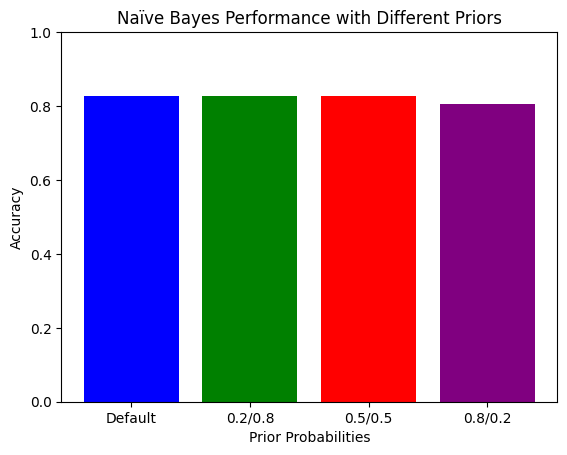

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different prior probability settings
priors_list = [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]]
accuracies = []

for priors in priors_list:
    # Train Naive Bayes classifier with specific priors
    model = GaussianNB(priors=priors)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Compute accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Priors: {priors}, Accuracy: {acc:.4f}")

# Plot the results
labels = ['Default', '0.2/0.8', '0.5/0.5', '0.8/0.2']
plt.bar(labels, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Prior Probabilities')
plt.ylabel('Accuracy')
plt.title('Naïve Bayes Performance with Different Priors')
plt.ylim(0, 1)
plt.show()


Q40  Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and
compare accuracy

Accuracy without RFE: 0.9561
Accuracy with RFE (top 10 features): 0.9737


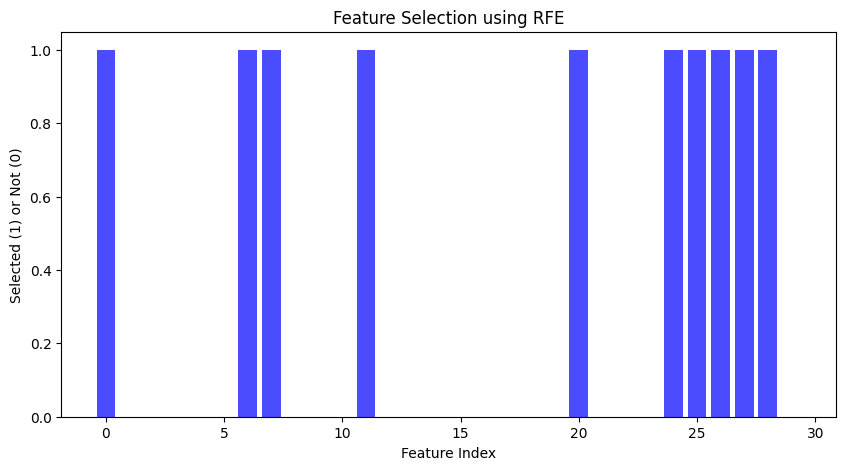

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM without feature selection
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy_no_rfe = accuracy_score(y_test, y_pred)

# Perform Recursive Feature Elimination (RFE)
num_features_to_select = 10  # Select top 10 features
rfe = RFE(estimator=SVC(kernel='linear', random_state=42), n_features_to_select=num_features_to_select)
rfe.fit(X_train, y_train)

# Transform datasets with selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train SVM on selected features
svm_rfe = SVC(kernel='linear', random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

# Print and compare accuracies
print(f'Accuracy without RFE: {accuracy_no_rfe:.4f}')
print(f'Accuracy with RFE (top {num_features_to_select} features): {accuracy_rfe:.4f}')

# Visualize feature selection
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), rfe.support_, color='blue', alpha=0.7)
plt.xlabel('Feature Index')
plt.ylabel('Selected (1) or Not (0)')
plt.title('Feature Selection using RFE')
plt.show()


Q41  Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')


Precision: 1.00
Recall: 1.00
F1-Score: 1.00


Q42 Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss, accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)
y_prob = nb_classifier.predict_proba(X_test)  # Probabilities for log loss calculation

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Log Loss: {logloss:.4f}')


Accuracy: 1.0000
Log Loss: 0.0263


Q43  Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn

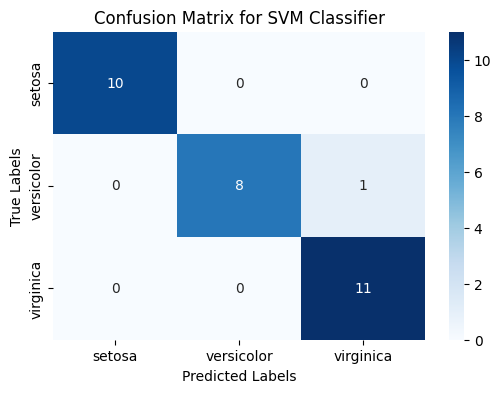

Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = svm_classifier.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Q44 Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE

Mean Absolute Error (MAE): 0.0734


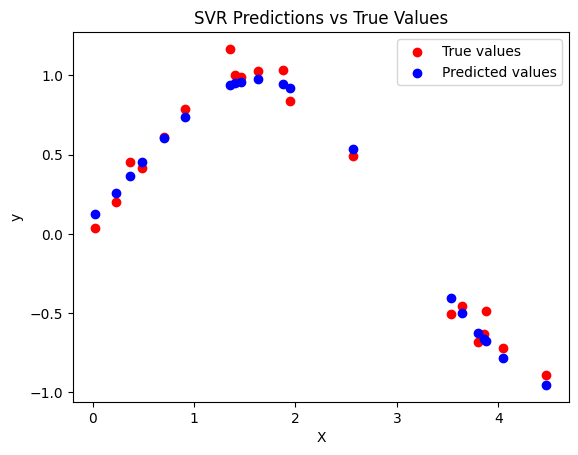

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Add some noise

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Predict
y_pred = svr_model.predict(X_test_scaled)

# Evaluate performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Plot results
plt.scatter(X_test, y_test, color='red', label='True values')
plt.scatter(X_test, y_pred, color='blue', label='Predicted values')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR Predictions vs True Values')
plt.legend()
plt.show()


Q45  Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score

ROC-AUC Score: 0.9984


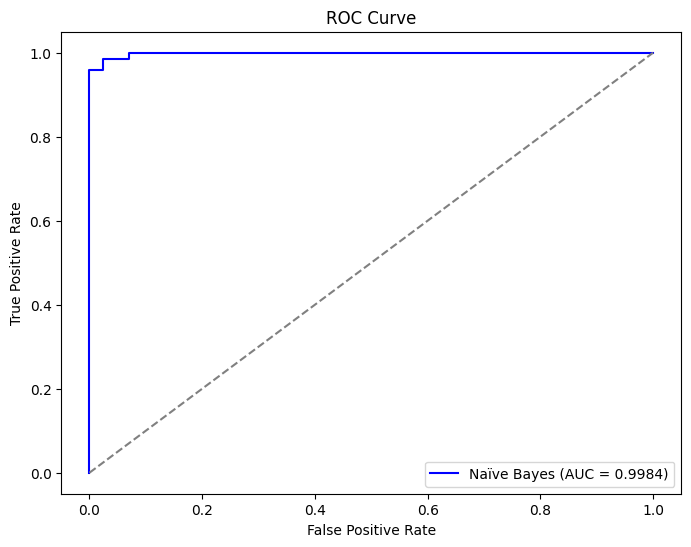

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict probabilities
y_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Naïve Bayes (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Q46 Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve

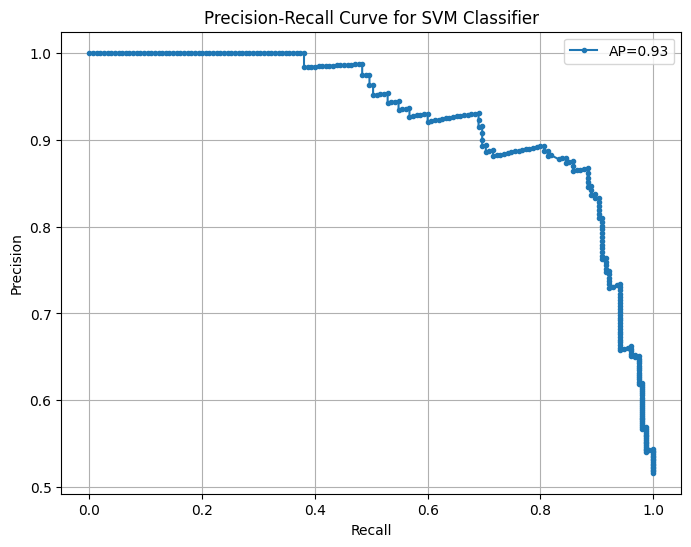

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM classifier with probability estimates enabled
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Get the predicted probabilities for the positive class
y_scores = svm_clf.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute Average Precision Score
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AP={avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM Classifier')
plt.legend()
plt.grid()
plt.show()